# Color palettes: sequential, diverging and qualitative

Why do you like to see patterns and graphs more than simply rows and columns of data? The patterns stand out, the colours speak loud and the effect is visually pleasing.

But what if all graphs are made simple and plain? What if instead of using colours for the bars in a barplot, we use it only the for labels and axes?

Colors in graphs are very important. If used the right way, they can enhance your plot a great deal, but if not paid attention to, they could hide very important details.

Seaborn provides the option to use colours for visualising data, through a variety of palettes.

In [33]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [34]:
fb_data=pd.read_csv('datasets/dataset_Facebook.csv',
                     sep=r'\s*;\s*', engine='python')

The simplest way to choose colours in Seaborn is to call the color_palette() function.
* Most helpful when working with discrete colors
* You can pass in the name of any Seaborn palette, matplotlib colormap, list of colors specified in valid matplotlib formats (RGB tuples, hex color codes, HTML color names)
* If the function is called without any arguments, the default color cycle is returned.
* Combine this with a "with" function to temporarily set color to the plot
* You can also set the same using the set_palette function. This will then be used as the default matplotlib parameters for all plots that follow.

*The last two points are demonstrated below*




<AxesSubplot:xlabel='Lifetime Post Total Reach', ylabel='Density'>

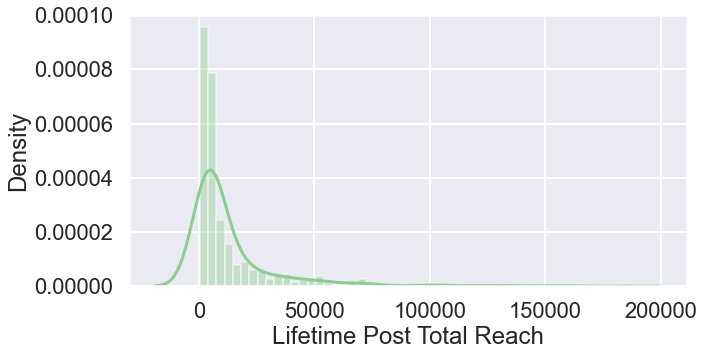

In [35]:
sns.set_palette("Greens_d")#<----------

f, ax=plt.subplots(figsize=(10,5))

sns.distplot(fb_data['Lifetime Post Total Reach'])

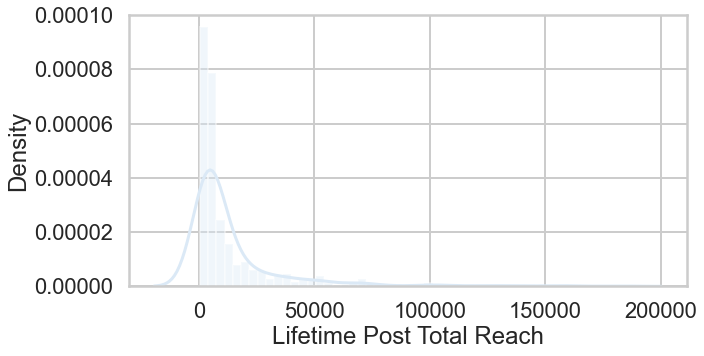

In [36]:
sns.set_style("whitegrid")

with sns.color_palette("Blues"):#<-----------use of with
    
    f,ax=plt.subplots(figsize=(10,5))

    sns.distplot(fb_data['Lifetime Post Total Reach'])

Depending on the kind of data you want to plot, you can choose from different categories of palettes:
* Qualitative palettes for categorical data
* Sequential or Diverging plots for large range of data 

## Qualitative Color Palettes

These palettes are mostly useful for plots that have categorical data, or data that varies in discrete chunks without an inherent ordering. It comes with 6 variations of default themes.

In [37]:
sns.set()#<----------reset

Let us use the Seaborn function palplot() to plot the values in the color palette as a horizontal array

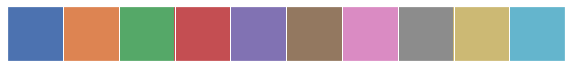

In [38]:
current_palette=sns.color_palette()
sns.palplot(current_palette)

The six variations are deep, muted, pastel, bright, dark and colorblind.

#### What does this translate to in a graph??

Just to understand this, let us plot a graph that involves multiple lines of different colours. Invoking the kde plot with different bandwidths, as seen in module 1, we get the below:

(-50.0, 800.0)

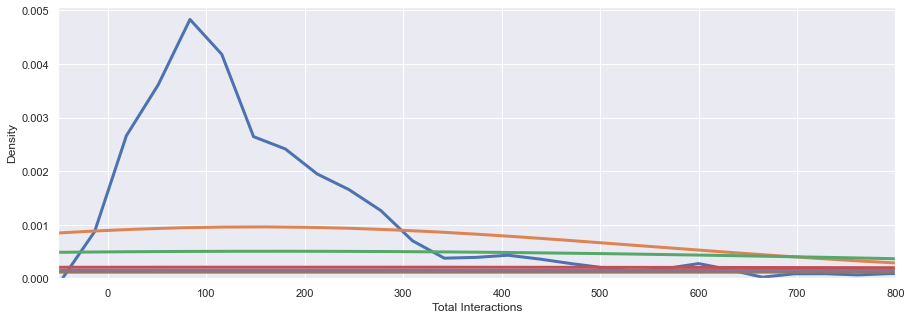

In [39]:
f,ax=plt.subplots(figsize=(15,5))

sns.set_context("poster") 
#This has been added just to see the colours better. We will look at this option in Module 3-c.

sns.kdeplot(fb_data['Total Interactions'], bw=.04, label="bw: 0.04")
sns.kdeplot(fb_data['Total Interactions'], bw=1, label="bw: 1")#<-------different color
sns.kdeplot(fb_data['Total Interactions'], bw=2, label="bw: 2")
sns.kdeplot(fb_data['Total Interactions'], bw=5, label="bw: 5")
sns.kdeplot(fb_data['Total Interactions'], bw=7, label="bw: 7")
sns.kdeplot(fb_data['Total Interactions'], bw=9, label="bw: 9")

plt.xlim(-50,800)

### What if there are more than 6 colours/lines needed in the plot?
**Remember the graphs we plotted in Module 1d on the wine dataset. There were violin plots, hue based on pH; we saw a variety of colours there. How does Seaborn do this?**<br>

*It uses a circular color space where the hue changes based on overlap of colors.*

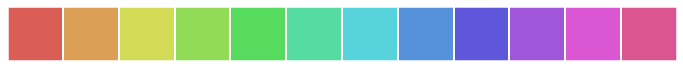

In [40]:
#                             hls: Hue-color, Lightness, Saturation
sns.palplot(sns.color_palette("hls", 12))#<---------hls with 12

* Varying the brightness and intensity of those plots
* Here, we are setting the lightness and saturation content of the hue.

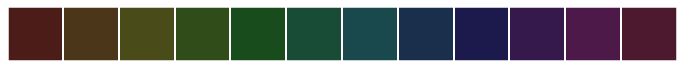

In [41]:
sns.palplot(sns.hls_palette(12, l=0.2, s=0.5))# hls: Hue-color, Lightness, Saturation

If we look at the strips above, it looks like the yellow-green range is brighter than the blue region. While this is not actually the case as all of these are of the same intensity in terms of RGB levels, our eyes perceive colours differently. 

To have a plot with same intensity as per human perception, you could make use of:
* husl interface 
        - you can use this by calling the 'husl' word with the color_palette function
        - you could also call it using the husl_palette() function
* Categorical Color Brewer Palette
        - Takes the help of the Color Brewer Tool
        - Calling a Color Brewer palette gives distinct colours, which cycle
        - Can use an ipython notebook to check the color brewer help catalogue

How do we know what palettes are available? How can we know what are the different colour shades Seaborn will choose when we assign a certain palette to a plot?
Seaborn offers an interface to the Color Brewer palette, and we can interactively see what Color Brew has to offer, as below.

In [42]:
#Help for choosing a qualitative panel
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

We see that the pairplot has pairs of colours that together form the color panel. Observe that the exact shades shown above are the ones used in the graph below.

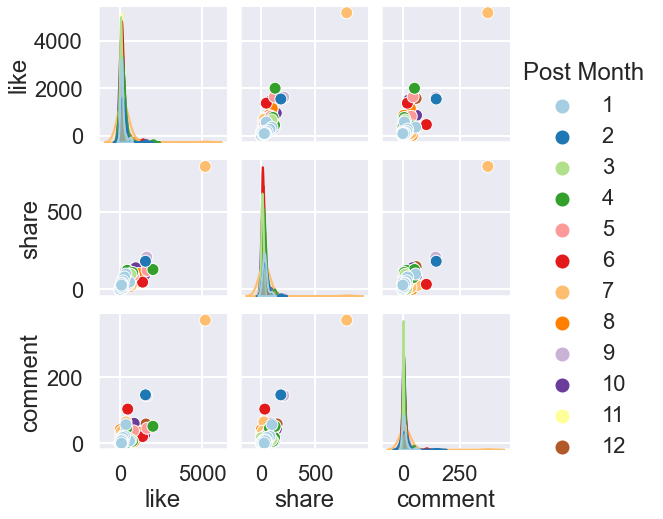

In [43]:
sns.pairplot(fb_data, 
             vars=["like", "share", "comment"],
             hue="Post Month",
             palette = "Paired")#<----------------like the dropbox above

### Can you specify colours explicitly?
Method1: List out the hex codes

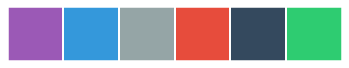

In [44]:
sns.palplot(sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]))


Method 2: Using named colors from the xkcd color survey that named RGB colors
Lets plot curves with a specific color for each

(-50.0, 800.0)

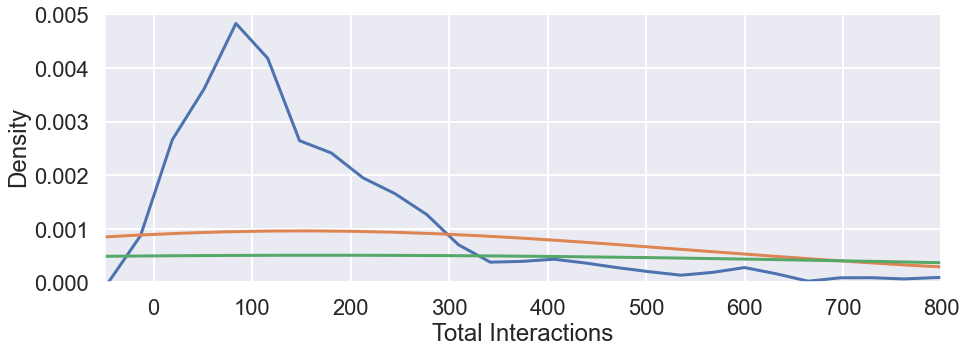

In [45]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(15,5))

sns.xkcd_rgb["pale red"]
sns.kdeplot(fb_data['Total Interactions'], bw=.04, label="bw: 0.04")

sns.xkcd_rgb["medium green"]#<------------------medium green ...
sns.kdeplot(fb_data['Total Interactions'], bw=1, label="bw: 1")

sns.xkcd_rgb["denim blue"]
sns.kdeplot(fb_data['Total Interactions'], bw=2, label="bw: 2")


plt.xlim(-50,800)

## Sequential Color Palettes
These palettes are most useful for plots where the data has a wide range, but the relatively low values are uninteresting, and the relatively high values are interesting.

* These are very commonly used as colormap in functions like kdeplot() or such matplotlib functions.
* Best to use palettes that have a relatively subtle shift in hue, accompanied by a large shift in brightness and saturation. Important data is highlighted well.
* You can choose the Color Brewer library for this too.

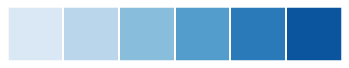

In [46]:
#Using the Blues palette
sns.palplot(sns.color_palette("Blues"))

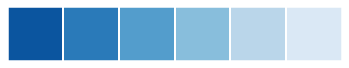

In [47]:
#Reversing the lightness ramp in the palette
sns.palplot(sns.color_palette("Blues_r"))

If you want to restrict the range of colors, to create a dark palette. This comes in handy while mapping lines or points for clarity.

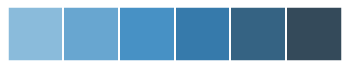

In [48]:
sns.palplot(sns.color_palette("Blues_d"))

#### Custom sequential palettes
Two functions - light_palette() and dark_palette() both have a single colour, with a range of intensities.

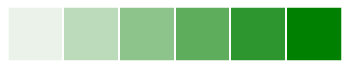

In [49]:
sns.palplot(sns.light_palette("green"))

Plotting a kdeplot with the above color palette. We use it as an object and pass it to the color map variable

(-5000.0, 15000.0)

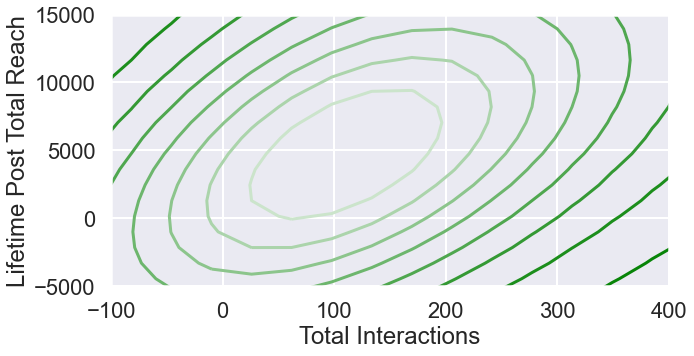

In [50]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(10,5))

cmap = sns.light_palette("green", as_cmap=True, reverse=True)#< kde with green
sns.kdeplot(fb_data['Total Interactions'],fb_data['Lifetime Post Total Reach'], 
            cmap=cmap);
#We can set the n_levels parameter to specify number of hue levels we need

plt.xlim(-100,400)
plt.ylim(-5000,15000)

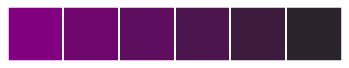

In [51]:
sns.palplot(sns.dark_palette("purple", reverse=True))#<----dark-------

### A reversed dark palette is similar in intensities to a light palette*

Note: Functions like choose_cubehelix_palette(), choose_light_palette(),choose_dark_palette() can be used to interactive widgets to create these palettes.

In [52]:
#Interactively see the palettes available for sequential distributions of data
sns.choose_colorbrewer_palette('sequential')#<-----------

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

##### Cubehelix Palettes
This is a sequential palette with a linear increase or decrease in brightness, along with hue variation.
*What is the advantage of this? Print the image, and even in the black and white image, the information will be preserved thanks to the variation in brightness.. It also works in favour of those with color blindness.*

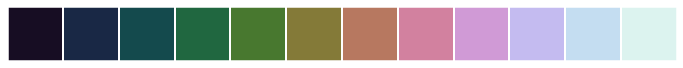

In [53]:
#Default cubehelix from matplotlib
sns.palplot(sns.color_palette("cubehelix", 12))#<-----cubehelix

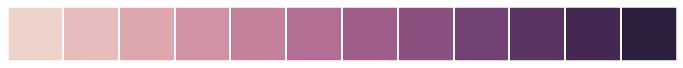

In [54]:
#Calling the default cubehelixpalette in Seaborn,
sns.palplot(sns.cubehelix_palette(12))

We make few observations about the default cubehelix pattern, when compared to the matplotlib version
* The color range is smaller
* The intensity range covered is lesser
* The order of colors is reversed - important values are darker.


Storing this object in a variable and mapping it in a kde plot,

(-5000.0, 15000.0)

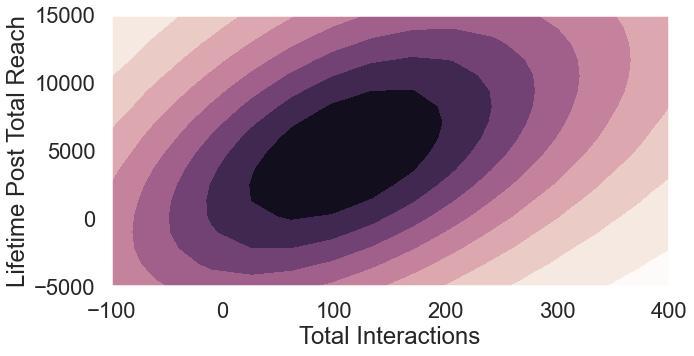

In [55]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(10,5))

cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(fb_data['Total Interactions'],fb_data['Lifetime Post Total Reach'], 
            cmap=cmap, shade=True);
#We can set the n_levels parameter to specify number of hue levels we need

plt.xlim(-100,400)
plt.ylim(-5000,15000)

**Customising the Cubehelix plot,**

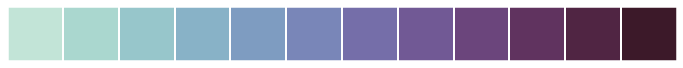

In [56]:
#Start between a value of 0 and 3; number of rotations between -1 and +1 on the hue wheel
sns.palplot(sns.cubehelix_palette(12, start=1, rot=-.70))

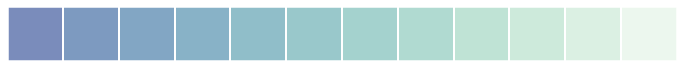

In [57]:
#Control the brightness of the dark and light points, and reverse the map.
sns.palplot(sns.cubehelix_palette(12, start=1, rot=-.70, dark=0.55, light=0.95, reverse=True))

(-5000.0, 15000.0)

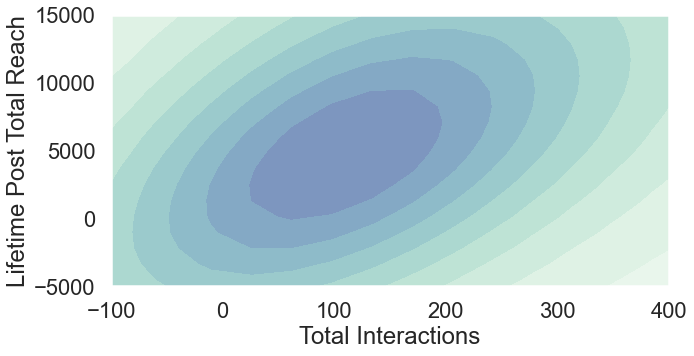

In [58]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(10,5))

cmap = sns.cubehelix_palette(12, start=1, rot=-.70,as_cmap=True, dark=0.55, light=0.95, reverse=False)#<-----
sns.kdeplot(fb_data['Total Interactions'],fb_data['Lifetime Post Total Reach'], 
            cmap=cmap, shade=True);

plt.xlim(-100,400)
plt.ylim(-5000,15000)